In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ps5lib

from IPython.display import Image

%pylab inline

Populating the interactive namespace from numpy and matplotlib


**1. For this problem, you'll need a bike wheel, the Classical Mechanics Notes, and some art. Hold each end of the axle with one hand, straight out in front of you, keeping your hands at the same level and your palms down, so the spokes are vertical. Spin it so that the top is approaching you.**

**(a) Sketch yourself holding the wheel. Show $\vec{\omega}$ and $\vec{L}$ on your sketch.**

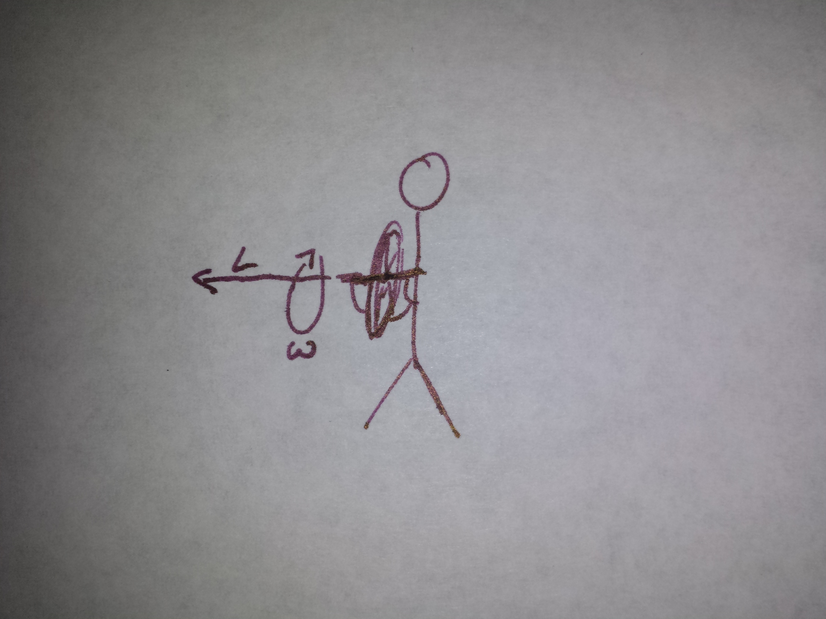

In [2]:
Image(filename='bikesketch.png') 

**(b) Now try to turn the wheel sideways, so your left hand is directly above your right hand.**

**Which way does the wheel pull you as it tries to preserve the angular momentum $\vec{L}$? Does this make sense? Why?**

The wheel tries to pull my left hand downwards and preserve its position. This is because the bike wheel is acting as a gyroscope.

**2. (a) Write down the Lagrangian for a bead of mass $m$ moving freely on a rotating hoop. Assume that the hoop is a perfect circle of radius $r$, that it can rotate freely around the vertical $(z)$ axis passing through its center, and that the bead moves freely along this circle. This system has two degrees of freedom, so you'll need two coordinates. For this problem, please use the angle $\theta$ between the bead and the vertical axis as one coordinate and the angle $\phi$ between the hoop and the $x$ axis as the other.**

We first determine how many degrees of freedom exist in the system. For such a hoop we have two degrees of freedom. The second task is to choose the generalized coordinates. There is the angle $\theta$ between the bead and the vertical axis, and there is the angle $\phi$ between one hoop and the $x$ axis as the other.

We assume that gravity exists for this hoop and bead, but may also take the value of zero. Since we're using spherical coordinates, we can assume that $v^2$ is equal to the sum of the squared velocities in the $r$, $\theta$, and $\phi$ directions.

$$
\begin{aligned}
T &=& \frac{1}{2} m v^2 &=& \frac{1}{2} m r^2 (\phi^2 \sin^2 \theta + \dot{\theta}^2)\\
V &=& mgh &=& mg r \cos \theta\\
\end{aligned}
$$

We can now write down the Lagrangian for this system.

$$
\mathcal{L} = T - V = \frac{1}{2} m r^2 (\dot{\phi}^2 \sin^2 \theta + \dot{\theta}^2) - mgr \cos \theta
$$

**(b) Use the Lagrangian to derive the equations of motion.**

$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial \dot{\theta}} &=& mr^2 \dot{\theta} \\
\frac{\partial \mathcal{L}}{\partial \theta} &=& \frac{1}{2} m r^2 \dot{\phi}^2 \sin (2\theta)\\
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{\theta}} \right) &=& mr^2 \ddot{\theta}\\
\frac{\partial \mathcal{L}}{\partial \dot{\phi}} &=& mr^2 \dot{\phi} \sin^2 \theta\\
\frac{\partial \mathcal{L}}{\partial \phi} &=& 0\\
\frac{d}{dt} \left( \frac{\partial \mathcal{L}}{\partial \dot{\phi}} \right) &=& mr^2 \ddot{\phi} \sin^2 \theta + mr^2 \dot{\phi} \dot{\theta} \sin (2 \theta)\\
\end{aligned}
$$

**(c) Given a Hamiltonian or Lagrangian, how do you identify cyclic coordinates?**

Cyclic coordinates are ones that are missing from $\mathcal{L}$. In this case we have $\phi$ as a cyclic coordinate.

**(d) Are there any conserved quantities in this system? If so, which one(s)?**

Since $\frac{\partial \mathcal{L}}{\partial \phi} = 0$, $\phi$ is conserved.

**3. Your task in this problem is to learn how to set up the two-body problem on a binary star system. Begin by playing with this applet and get a feel for the effects of a different initial conditions and masses: [http://phet.colorado.edu/sims/my-solar-system/my-solar-system_en.html](http://phet.colorado.edu/sims/my-solar-system/my-solar-system_en.html).**

**To make things simple, assume that the stars are of equal, normalized masses ($m_1 = m_2 = 0.5$), and set both the semimajor axis $a$ of the orbit and the gravitational constant $G$ to $1.0$.**

**(a) Sketch and dimension the elliptical orbit of one star around the other (pick either one) for an eccentricity $e$ of $0.7$.**

**Can you sketch the ellipse of your star's orbit around the other, on the same plot?**

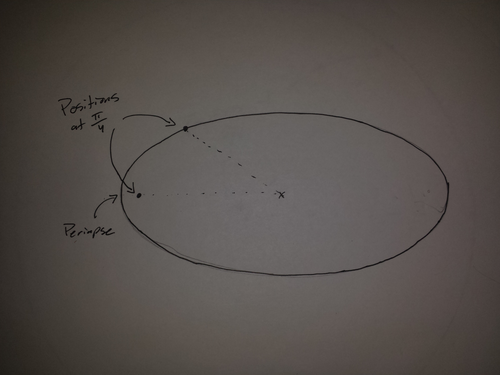

In [3]:
Image(filename='e07.png') 

**(b) Repeat (a) for $e = 0$.**

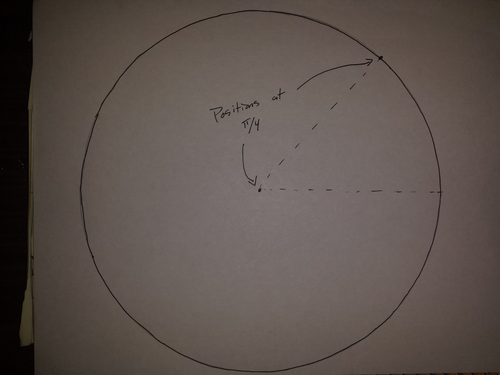

In [4]:
Image(filename='e0.png') 

**4. The final task in setting up the two-body equations is to choose a coordinate system and figure out the initial conditions in that frame of reference. For this problem please use a space-fixed coordinate system and place its origin at the initil position of one member of the binary.**

**(a) Compute the period of the orbit using Kepler's third law.**

We need to use the formula

$$
P = \sqrt{\frac{4 \pi^2 a^3}{\gamma}}
$$

Where $\gamma = G(m_1 + m_2)$, $G = 1$, and $a = 1$. as is established earlier in the problem description.

In [15]:
g = 1
m1 = 0.5
m2 = 0.5
p = np.sqrt((4 * (np.pi**2) * (1**3)) / (g * (m1 + m2)))
p

6.2831853071795862

**(b) Draw a picture of the coordinate axes and show the positions of both stars at $t = 0$.**

**(c) Compute the velocity of the star that is not at the origin. Indicate its direction on the drawing.**

We can compute the velocity of the star that is not at the origin by using the following formula.

$$
\sqrt{\frac{G(m_1 + m_2)}{r}}
$$

See [http://en.wikipedia.org/wiki/Circular_orbit](http://en.wikipedia.org/wiki/Circular_orbit)

In [19]:
np.sqrt((g * (m1 + m2)) / 1)

1.0

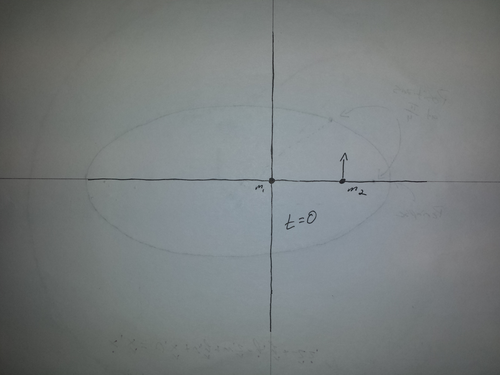

In [14]:
Image(filename="coordinateaxes.png")

**(d) Use these results to fill in the twelve components of $\vec{r_1}, \vec{r_2}, \dot{\vec{r_1}}$, and $\dot{\vec{r_2}}$ for the two body equation.**

These twelve components are defined as the following.

$$
\begin{aligned}
\dot{x}_1 &=& u_1\\
\dot{y}_1 &=& v_1\\
\dot{z}_1 &=& w_1\\
\ddot{x}_1 &=& -Gm_2 \frac{(x_1 - x_2)}{ {\left[{(x_1 - x_2)}^2 + {(y_1 - y_2)}^2 + {(z_1 - z_2)}^2\right] }^{(3/2)} }\\
\ddot{y}_1 &=& -Gm_2 \frac{(y_1 - y_2)}{ {\left[{(x_1 - x_2)}^2 + {(y_1 - y_2)}^2 + {(z_1 - z_2)}^2\right]}^{(3/2)} }\\
\ddot{z}_1 &=& -Gm_2 \frac{(z_1 - z_2)}{ {\left[{(x_1 - x_2)}^2 + {(y_1 - y_2)}^2 + {(z_1 - z_2)}^2\right]}^{(3/2)} }\\
\dot{x}_2 &=& u_2\\
\dot{y}_2 &=& v_2\\
\dot{z}_2 &=& w_2\\
\ddot{x}_2 &=& -Gm_1 \frac{(x_2 - x_1)}{ {\left[{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2 + {(z_2 - z_1)}^2\right]}^{(3/2)} }\\
\ddot{y}_2 &=& -Gm_1 \frac{(y_2 - y_1)}{ {\left[{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2 + {(z_2 - z_1)}^2\right]}^{(3/2)} }\\
\ddot{z}_2 &=& -Gm_1 \frac{(z_2 - z_1)}{ {\left[{(x_2 - x_1)}^2 + {(y_2 - y_1)}^2 + {(z_2 - z_1)}^2\right]}^{(3/2)} }\\
\end{aligned}
$$

We can use what we know to figure out the initial state.

$$
\begin{aligned}
\dot{x}_1 &=& 0\\
\dot{y}_1 &=& 0\\
\dot{z}_1 &=& 0\\
\ddot{x}_1 &=& 0\\
\ddot{y}_1 &=& 0\\
\ddot{z}_1 &=& 0\\
\dot{x}_2 &=& 1\\
\dot{y}_2 &=& 0\\
\dot{z}_2 &=& 0\\
\ddot{x}_2 &=& 0\\
\ddot{y}_2 &=& 1\\
\ddot{z}_2 &=& 0\\
\end{aligned}
$$

**(e) Compute the six components of $\vec{r}$ and $\dot{\vec{r}}$ for the reduced two body equation for this binary system. Which star, in the drawing, did you choose as the origin?**

These six components are defined as the following.

$$
\begin{aligned}
\dot{x} &=& u\\
\dot{y} &=& v\\
\dot{z} &=& w\\
\ddot{x} &=& -\gamma \frac{x}{{|x|}^3}\\
\ddot{y} &=& -\gamma \frac{y}{{|y|}^3}\\
\ddot{z} &=& -\gamma \frac{z}{{|z|}^3}\\
\end{aligned}
$$

Where $\gamma = G(m_1 + m_2)$.

If we choose the star that is located at the origin in the previous problem as our origin, we get the following initial condition.

$$
\begin{aligned}
\dot{x} &=& 1\\
\dot{y} &=& 0\\
\dot{z} &=& 0\\
\ddot{x} &=& 0\\
\ddot{y} &=& 1\\
\ddot{z} &=& 0\\
\end{aligned}
$$